In [1]:
import pandas as pd
import numpy as np
import openpyxl

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, plot_confusion_matrix

%matplotlib inline

In [2]:
# import dataset
df_train = pd.read_csv("F:\Personal Interest\Data science\Prectice Projects\Occupancy Data - UCI ML\DATASET\datatraining.txt", sep=",")

# check shape of the dataset
print(df_train.shape)

# check overview of the trainset
df_train.head()

(8143, 7)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [3]:
# import dataset
df_test_1 = pd.read_csv("F:\Personal Interest\Data science\Prectice Projects\Occupancy Data - UCI ML\DATASET\datatest.txt", sep=",")

# check shape of the dataset
print(df_test_1.shape)

# check overview of the trainset
df_test_1.head()

(2665, 7)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [4]:
# import dataset
df_test_2 = pd.read_csv("F:\Personal Interest\Data science\Prectice Projects\Occupancy Data - UCI ML\DATASET\datatest2.txt", sep=",")

# check shape of the dataset
print(df_test_2.shape)

# check overview of the trainset
df_test_2.head()

(9752, 7)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [5]:
df_train.drop('date',inplace=True, axis=1)
df_test_1.drop('date',inplace=True, axis=1)
df_test_2.drop('date',inplace=True, axis=1)

df_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


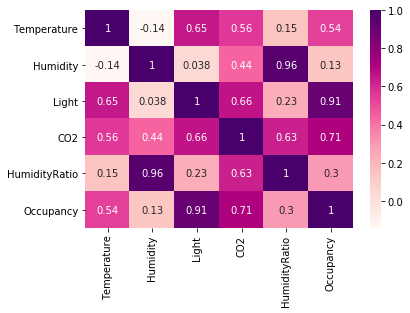

In [6]:
corr = df_train.corr()
sns.heatmap(corr, cmap="RdPu", annot=True)

In [7]:
unoccupied = df_train[df_train['Occupancy'] == 0] # filtering only non-fraud cases
occupied = df_train[df_train['Occupancy'] == 1] # filtering fraud cases

print("Count of unoccupied class: ")
print(unoccupied['Occupancy'].count())

print("Count of occupied class: ")
print(occupied['Occupancy'].count())

Count of unoccupied class: 
6414
Count of occupied class: 
1729


In [8]:
# replicating occupied data to balance out the class imbalance

# n = unoccupied.shape[0]

# occ_repeat = resample(
#     occupied,
#     replace=True,
#     n_samples=int(n), # we have taken 75% of the majority class number for resampling
#     random_state=1
# )

# occ_repeat.shape

In [9]:
# concatenating oversampled class to unoccupied class

#data_comb = pd.concat([unoccupied,occ_repeat], ignore_index=True)

data_comb = df_train.copy()

#data_comb = data_comb.sample(frac=1).reset_index(drop=True)

print(data_comb.shape)

data_comb.head()

(8143, 6)


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


In [10]:
# standard normalization of independent variable columns

stdnorm = StandardScaler()

features = list(data_comb.columns[:-1])

data_comb[features] = stdnorm.fit_transform(data_comb[features])
df_test_1[features] = stdnorm.transform(df_test_1[features])
df_test_2[features] = stdnorm.transform(df_test_2[features])

data_comb.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2.518470,0.278526,1.573763,0.364948,1.091757,1
2,2.488967,0.277713,1.591735,0.341881,1.080555,1
3,2.488967,0.273645,1.573763,0.340290,1.075888,1
4,2.488967,0.265508,1.573763,0.323587,1.066555,1
5,2.439796,0.265508,1.573763,0.311655,1.049523,1


In [11]:
df_test_1.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,3.029851,0.097723,2.391247,0.453875,1.057936,1
141,3.047553,0.100977,2.356329,0.489510,1.067907,1
142,3.059354,0.090129,2.326889,0.518993,1.059097,1
143,3.051978,0.071145,1.921656,0.535167,1.034012,1
144,3.082956,0.084705,1.895211,0.548689,1.060788,1


In [12]:
# taking different feature sets for training

columns = [
    'Temperature',
    'Humidity',
    'Light', 
    'CO2', 
    'HumidityRatio',
    'Occupancy']

data = data_comb[columns]
df_test1 = df_test_1[columns]
df_test2 = df_test_2[columns]

In [13]:
# def train_set_creator(df):
#     X_train = df.drop('Occupancy', axis=1).values # features
#     y_train = df['Occupancy'].values # labels
#     return X_train, y_train

def test_set_creator(df):
    X_t = df.drop('Occupancy', axis=1).values # features
    y_t = df['Occupancy'].values # labels
    return X_t, y_t

In [22]:
X = data.drop('Occupancy', axis=1).values
y = data['Occupancy'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2, 
    random_state = 1
    )

In [23]:
X_test1, y_test1 = test_set_creator(df_test1)
X_test2, y_test2 = test_set_creator(df_test2)

In [24]:
pipeline = Pipeline([
    ('sampling',SMOTE(sampling_strategy = 1.0)),
    ('rft',RandomForestClassifier())
])

In [27]:
# Number of trees in random forest
n_estimators = [int(i) for i in range(100,601,40)]

# # Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [6,8,10,12,16]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6]

# Create the random grid
random_grid = {'rft__n_estimators': n_estimators,
               'rft__max_features': max_features,
               'rft__max_depth': max_depth,
               'rft__min_samples_split': min_samples_split,
               'rft__min_samples_leaf': min_samples_leaf,}


# evaluation metrices
score_metrics = {'F1':'f1',
                'Accuracy':'accuracy',
                'Recall':'recall',
                'Precision':'precision',}

# Use the random grid to search for best hyperparameters
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rft_random = RandomizedSearchCV(
    pipeline, param_distributions = random_grid, n_iter = 100, 
    cv = 5, verbose = 2, random_state = 1, n_jobs = -1, 
    scoring = score_metrics, refit = 'F1')

# Fit the random search model
rft_random.fit(X, y)

# end validation
print("Cross-Validation done.")

# return best parameters
rft_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Cross-Validation done.


{'rft__n_estimators': 220,
 'rft__min_samples_split': 2,
 'rft__min_samples_leaf': 6,
 'rft__max_features': 'auto',
 'rft__max_depth': 6}

In [28]:
result_cv = rft_random.cv_results_

In [34]:
df_cv_result = pd.concat([
    pd.DataFrame(result_cv['params']),
    pd.DataFrame(result_cv['mean_test_Accuracy'],columns=['Acuracy']),
    pd.DataFrame(result_cv['mean_test_Recall'],columns=['Recall']),
    pd.DataFrame(result_cv['mean_test_Precision'],columns=['Precision']),
    pd.DataFrame(result_cv['mean_test_F1'],columns=['F1 Score'])
], 
    axis=1)

In [ ]:
df_cv_result.to_excel()

In [30]:
rft_best = rft_random.best_estimator_

In [53]:
# rft_best.fit(X, y)

RandomForestClassifier(max_depth=6)

In [31]:
# Creating Random Forest Tree model

# rft = RandomForestClassifier(max_depth = 5)
# rft.fit(X_train, y_train)


rft_ypred = rft_best.predict(X_test)
rft_ypred_test1 = rft_best.predict(X_test1)
rft_ypred_test2 = rft_best.predict(X_test2)

print("rft prediction done.")

rft prediction done.


RFT Training
[[1254   16]
 [   0  359]]


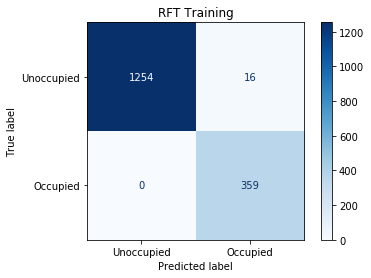

RFT Test 1
[[1641   52]
 [  66  906]]


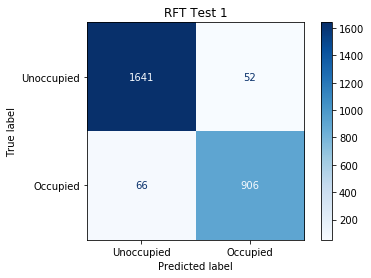

RFT Test 2
[[7524  179]
 [ 138 1911]]


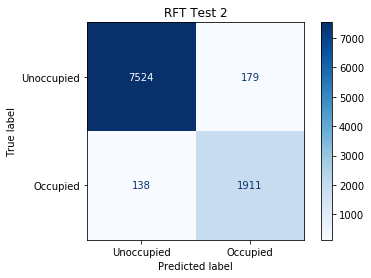

In [32]:
# model names, models and predicted values for each model
models = {'RFT Training':[rft_best, rft_ypred, y_test, X_test],
        'RFT Test 1':[rft_best, rft_ypred_test1, y_test1, X_test1],
        'RFT Test 2':[rft_best, rft_ypred_test2, y_test2, X_test2]}

# list of classes
class_names = ['Unoccupied','Occupied']

# blank dictionaries for saving evaluation metrics for each model 
accuracy = {}
f1_score_dict = {}
precision = {}
recall = {}

for model, model_output in models.items():
    acc = accuracy_score(model_output[2], model_output[1]) # accuracy
    pre = precision_score(model_output[2], model_output[1]) # precision
    rec = recall_score(model_output[2], model_output[1]) # recall
    f1_sc = f1_score(model_output[2], model_output[1]) # f1 score
    
    # rounding and saving values to disctionary
    accuracy[model] = round(acc,3)
    precision[model] = round(pre,3)
    recall[model] = round(rec,3)
    f1_score_dict[model] = round(f1_sc,3)

    # plotting confusion matrix for each model
    disp = plot_confusion_matrix(
        model_output[0], 
        model_output[3], 
        model_output[2],
        display_labels=class_names,
        cmap=plt.cm.Blues
    )

    disp.ax_.set_title(model)

    print(model)
    print(disp.confusion_matrix)

    plt.show()

In [33]:
print(pd.Series(accuracy).to_frame('Accuracy'))
print('--------------')
print(pd.Series(recall).to_frame('Recall'))
print('--------------')
print(pd.Series(precision).to_frame('Precision'))
print('--------------')
print(pd.Series(f1_score_dict).to_frame('F1 Score'))

              Accuracy
RFT Training     0.990
RFT Test 1       0.956
RFT Test 2       0.967
--------------
              Recall
RFT Training   1.000
RFT Test 1     0.932
RFT Test 2     0.933
--------------
              Precision
RFT Training      0.957
RFT Test 1        0.946
RFT Test 2        0.914
--------------
              F1 Score
RFT Training     0.978
RFT Test 1       0.939
RFT Test 2       0.923


In [18]:
# from sklearn import tree

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4), dpi=900)

# # estract estimator
# for index in range(0,1): 
#     fn = list(df_test.columns)
#     cn  =['Unoccupied', 'Occupied']
    
#     tree.plot_tree(rft.estimators_[index],
#                 feature_names = fn, 
#                 class_names=cn,
#                 filled = True,
#                 ax = axes)
#     axes.set_title('Estimator: ' + str(index), fontsize = 11)
#     #fig.savefig('imagename.png')


In [19]:
# fig.savefig('Tree.png')